In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 퍼셉트론이란?
* 입력된 다수에 데이터에 대해 어떠한 처리( 가중치 $w$ )를 곱해서 출력 하나($y$)를 내는 것

$$
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 \leq \theta)
\\ 1 \enspace (w_1x_1 + w_2x_2 > \theta) \end{cases}
$$

위 수식을 반응 조건 계산식 이라고 한다.

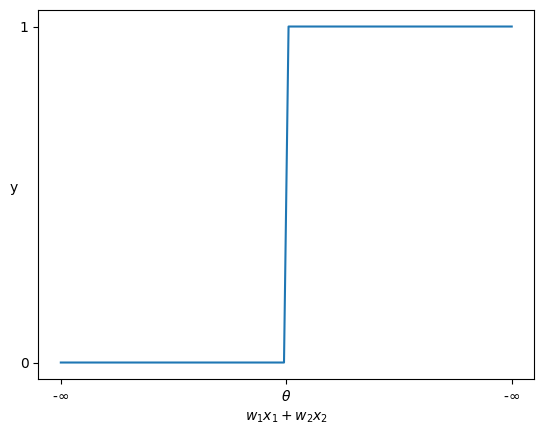

In [2]:
def perceptron_1(x1, x2):

  # 임의의 가중치와 임계치 지정
  w1, w2, theta = 0.5, 0.5, 2

  z = w1*x1 + w2*x2

  # 최종 출력값 y
  y = (z >= theta) # z가 theta를 넘으면 1, 못 넘으면 0

  return z, y

# 입력 데이터 생성
x1 = np.linspace(-3, 7, 100)
x2 = np.linspace(-3, 7, 100)

# 퍼셉트론의 결과물 구하기
y_value, y_result = perceptron_1(x1, x2)

# 시각화
plt.plot(y_value, y_result)
plt.yticks([0, 1])
plt.xticks([-3,2,7], [r'-$\infty$', r'$\theta$', r'-$\infty$'])
plt.xlabel(r"$w_1x_1+w_2x_2$")
plt.ylabel("y", rotation=0)
plt.show()

# AND 게이트 구현 1

In [4]:
def AND(x1, x2):
  # x1, x2에 대해서 조건 검사 (if)를 하는 것은 퍼셉트론이 아니다!!!
  # w1x1 + w2x2 > theta

  w1, w2, theta = 0.5, 0.5, 0.7
  z = w1 * x1 + w2 * x2

  y = int(z > theta)

  return y

In [5]:
AND(0, 0), AND(0, 1), AND(1, 0), AND(1, 1)

(0, 0, 0, 1)

$\theta$를 기준으로 $w_1x_1 + w_2x_2$의 결과가 0 또는 1로 결정지어 진다. 이걸 일반화 시켜 어느 상황에서든 **반응 조건 계산식**을 활용할 수 있도록 일반화 시켜보기

* 원래 수식

 * $
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 \leq \theta)
\\ 1 \enspace (w_1x_1 + w_2x_2 > \theta) \end{cases}
$

* 바뀐 수식

 * $
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 -\theta \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 -\theta > 0) \end{cases}
$

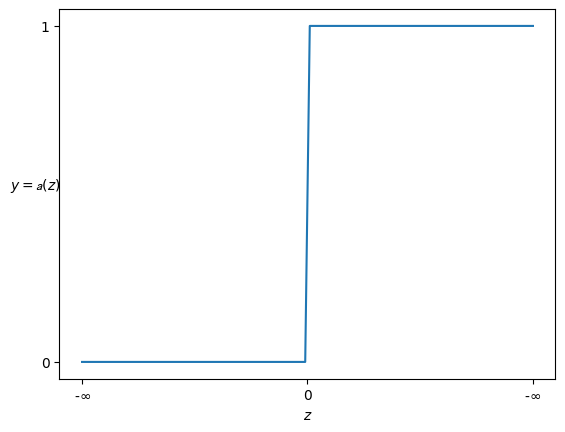

In [6]:
z = np.linspace(-3, 3, 100)
plt.plot(z, z > 0)
plt.yticks([0, 1])
plt.xticks([-3, 0, 3],[r'-$\infty$', r'$0$', r'-$\infty$'])
plt.xlabel(r"$z$")
plt.ylabel(r"$y=\mathcal{a}(z)$", rotation=0)
plt.show()

# AND 게이트 구현 2
$\theta$를 넘냐, 못넘냐에 대한 문제에서 0을 넘냐 못 넘냐가 됐음

In [7]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7

  z = w1 * x1 + w2 * x2 - theta

  y = int(z > 0)

  return y

In [8]:
AND(0, 0), AND(0, 1), AND(1, 0), AND(1, 1)

(0, 0, 0, 1)

* $
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 -\theta \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 -\theta > 0) \end{cases}
$

  * $-\theta$를 $b$로 변경한다.( $\theta$ = $-b$)

* $
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 +b \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 +b > 0) \end{cases}
$

* $z = w_1x_1 + w_2x_2 +b$

* $
y = \begin{cases}
0 \enspace (z \leq 0)
\\ 1 \enspace (z > 0) \end{cases}
$

* $
a(z) = \begin{cases}
0 \enspace (z \leq 0)
\\ 1 \enspace (z > 0) \end{cases}
$

* $y=a(z)$
* 함수$a$를 **단위 계단 함수**

In [9]:
def AND(x1, x2):
  w1, w2, b = 0.5, 0.5, -0.7

  x = np.array([x1, x2])
  w = np.array([w1, w2])

  z = w @ x + b

  y = int(z > 0)
  return y

In [10]:
AND(0, 0), AND(0, 1), AND(1, 0), AND(1, 1)

(0, 0, 0, 1)

### 가중치와 편향에 대한 의미
* 가중치 : 입력값에 대한 중요도
  * 입력된 데이터에 대해 결과물이 1로 가거나, 0으로 갈 수 있도록 입력값을 조절하는 변수
* 편향 : 퍼셉트론이 얼마나 **쉽게 활성화가 되는가**를 결정
  * 활성화? 퍼셉트론의 결과물이 1이 되는것, $z$가 0을 넘어가는 것
  * 편향이 크다면 입력 데이터나 가중치가 아무리 작아도 쉽게 활성화가 된다.
    * 흥분도가 큰 퍼셉트론 - 민감한 퍼셉트론
  * 편향이 작다면 입력 데이터나 가중치가 아무리 커도 쉽게 활성화가 되지 않는다.
    * 흥분도가 낮은 퍼셉트론 - 둔감한 퍼셉트론

# NAND 게이트 구현
AND 게이트의 가중치, 편향의 부호를 거꾸로

In [11]:
def NAND(x1, x2):
  x = np.array([x1, x2])

  w1, w2, b = -0.5, -0.5, 0.7
  w = np.array([w1, w2])

  z = w @ x + b
  y = int(z > 0)

  return y

In [12]:
NAND(0, 0), NAND(1, 0), NAND(0, 1), NAND(1, 1)

(1, 1, 1, 0)

# OR 게이트
AND 게이트의 가중치, 편향을 적절히 조절

In [13]:
def OR(x1, x2):
  x = np.array([x1, x2])

  w = np.array([0.5, 0.5])
  b = -0.2

  z = w @ x + b
  return int(z > 0)

OR(0, 0), OR(1, 0), OR(0, 1), OR(1, 1)

(0, 1, 1, 1)

AND, NAND, OR 게이트를 구축하는 방법은 똑같으나, W, b가 달라짐에 따라서 **하는 일이 달라진다**

각각 하나의 퍼셉트론으로써 연산을 충실히 수행.

각각 입력값을 받아서 각자의 역할을 충실히 수행 하면, 한번의 입력에 대한 한번의 출력이 이루어 진다. : **단층 퍼셉트론**



# 각각의 일을 충실히 수행하는 단층 퍼셉트론을 여러 개 쌓아서 다층 퍼셉트론을 만들자
단층퍼셉트론 으로는 해결 할 수 없던 일을 다층 퍼셉트론을 해결 할 수 있다.

In [15]:
def XOR(x1, x2):
  # 같은 값이 들어오면 0
  # 다른 값이 들어오면 1

  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)

  y = AND(s1, s2)

  return y

In [16]:
XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1)

(0, 1, 1, 0)